In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
cars = pd.read_excel("D:\Python_DataScience\Data_Sets\Participants_Data_Used_Cars\Participants_Data_Used_Cars\Data_Test.xlsx")

In [72]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [73]:
cars[(cars['Fuel_Type']=='Electric')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


In [74]:
#cars.drop(cars[cars['Fuel_Type'] == 'Electric'].index, inplace = True) 

In [75]:
cars[['Mil', 'Mil_scl']] = cars.Mileage.str.split(' ',expand = True)
cars[['Eng', 'Eng_scl']] = cars.Engine.str.split(' ',expand = True)
cars[['Pwr', 'Pwr_scl']] = cars.Power.str.split(' ',expand = True)

In [76]:
cars.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
Mil                     0
Mil_scl                 0
Eng                    10
Eng_scl                10
Pwr                    10
Pwr_scl                10
dtype: int64

In [77]:
cars['Pwr'] = cars['Pwr'].apply(lambda x: np.nan if x == "null" else x)

In [78]:
cars['Mil'] = cars.Mil.astype(float)
cars['Eng'] = cars.Eng.astype(float)
cars['Pwr'] = cars.Pwr.astype(float)

In [79]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 18 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
Mil                  1234 non-null float64
Mil_scl              1234 non-null object
Eng                  1224 non-null float64
Eng_scl              1224 non-null object
Pwr                  1202 non-null float64
Pwr_scl              1224 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 115.7+ KB


In [80]:
cars.describe()

,Year,Kilometers_Driven,Seats,Mil,Eng,Pwr
count,1234.000000,1234.000000,1223.000000,1234.000000,1224.000000,1202.000000
mean,2013.400324,58507.288493,5.284546,18.173857,1593.584967,110.380420
std,3.179700,35598.702098,0.825622,4.464615,564.347723,51.543818
min,1996.000000,1000.000000,2.000000,0.000000,624.000000,34.200000
25%,2011.000000,34000.000000,5.000000,15.215000,1198.000000,75.000000
50%,2014.000000,54572.500000,5.000000,18.250000,1461.000000,93.700000
75%,2016.000000,75000.000000,5.000000,21.100000,1968.000000,130.000000
max,2019.000000,350000.000000,10.000000,32.260000,5998.000000,616.000000


In [81]:
cars.Kilometers_Driven.min()

1000

In [82]:
cars['Brand'] = cars.Name.str.split(' ',expand = True)[0]
cars['Model'] = cars.Name.str.split(' ',expand = True)[1]

In [83]:
cars.Brand.value_counts()

Hyundai          233
Maruti           233
Honda            135
Toyota            96
Mercedes-Benz     62
Volkswagen        59
Mahindra          59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Volvo              7
Land               7
Mini               5
Datsun             4
Jeep               4
Hindustan          1
Bentley            1
ISUZU              1
OpelCorsa          1
Isuzu              1
Porsche            1
Name: Brand, dtype: int64

In [84]:
cars['Brand'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'Mini', 'Bentley', 'Land', 'Volvo',
       'Isuzu', 'Jeep', 'Porsche', 'ISUZU', 'OpelCorsa'], dtype=object)

In [85]:
cars["Eng_scl"].nunique()

1

In [86]:
cars["Model"].nunique()

161

In [87]:
cars["Fuel_Type"].nunique()

4

In [88]:
cars.Fuel_Type.value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [89]:
cars.Seats.value_counts()

5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [90]:
for col in cars.columns:
    print(col)

Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Mil
Mil_scl
Eng
Eng_scl
Pwr
Pwr_scl
Brand
Model


In [91]:
ccd = cars[['Brand','Model','Eng','Pwr','Mil','Kilometers_Driven','Seats','Fuel_Type','Transmission','Owner_Type','Location','New_Price']]

In [92]:
ccd.head()

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
0,Maruti,Alto,998.0,58.20,32.26,40929,4.0,CNG,Manual,First,Delhi,NaN
1,Maruti,Alto,796.0,47.30,24.70,54493,5.0,Petrol,Manual,Second,Coimbatore,NaN
2,Toyota,Innova,2393.0,147.80,13.68,34000,7.0,Diesel,Manual,First,Mumbai,25.27 Lakh
3,Toyota,Etios,1364.0,NaN,23.59,139000,5.0,Diesel,Manual,First,Hyderabad,NaN
4,Hyundai,i20,1197.0,82.85,18.50,29000,5.0,Petrol,Manual,First,Mumbai,NaN


In [93]:
ccd.isna().sum()

Brand                   0
Model                   0
Eng                    10
Pwr                    32
Mil                     0
Kilometers_Driven       0
Seats                  11
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            1052
dtype: int64

In [94]:
ccd['Brand'] = ccd['Brand'].str.capitalize()

c:\users\venkataswamyn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


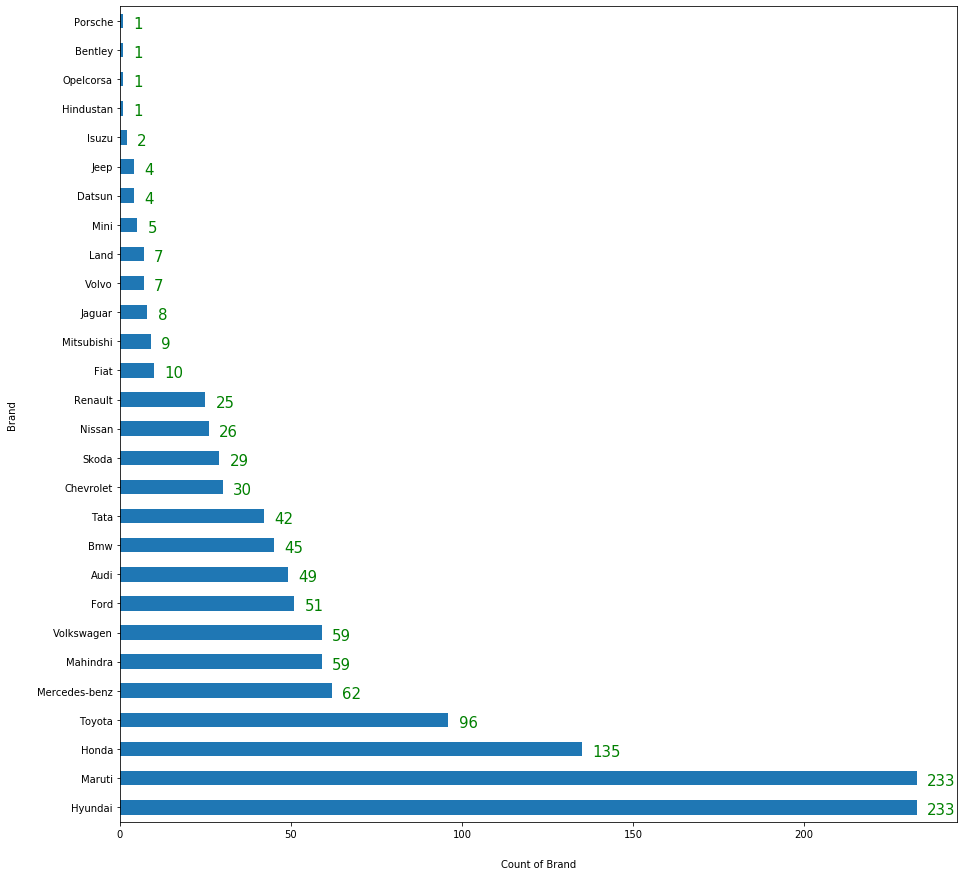

In [95]:
ax = ccd.Brand.value_counts().plot.barh(figsize=(15,15))
plt.ylabel("Brand", labelpad = 20)
plt.xlabel("Count of Brand", labelpad = 20)
for i in ax.patches:
         ax.text(i.get_width()+3, i.get_y(),i.get_width(), color = 'Green', fontsize = 15)
plt.show()

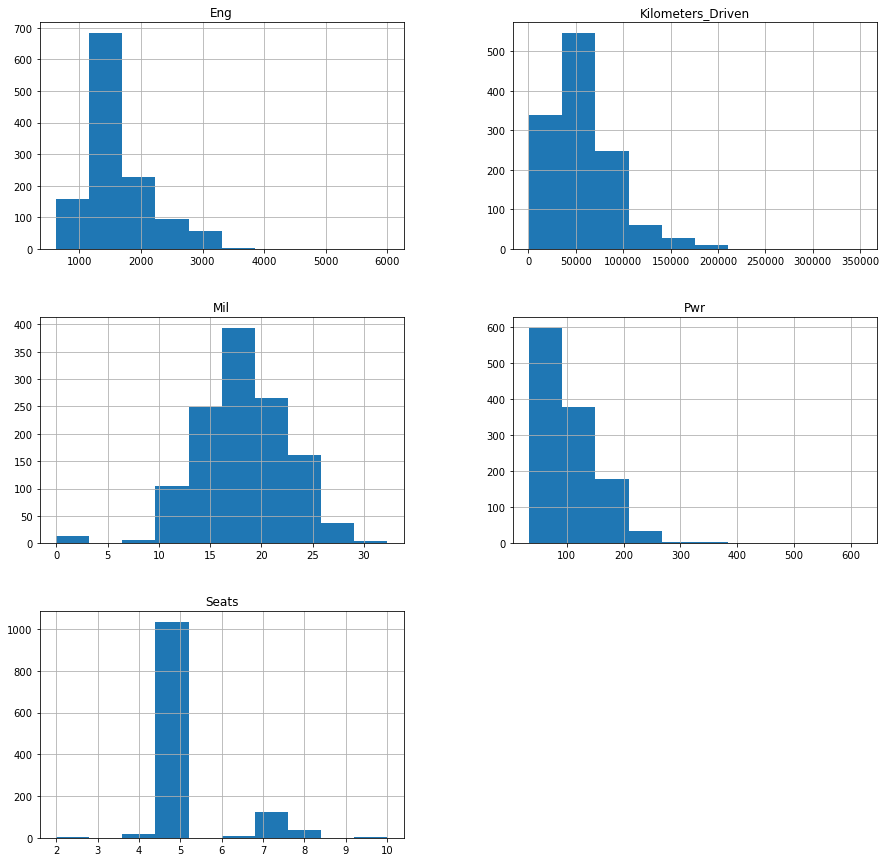

In [96]:
ccd.hist(bins=10, figsize=(15,15))
plt.show()

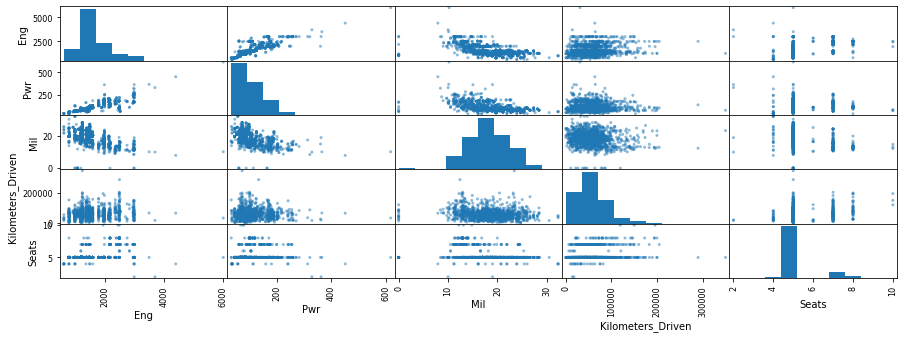

In [97]:
pd.plotting.scatter_matrix(ccd, figsize=(15, 5))
plt.show()

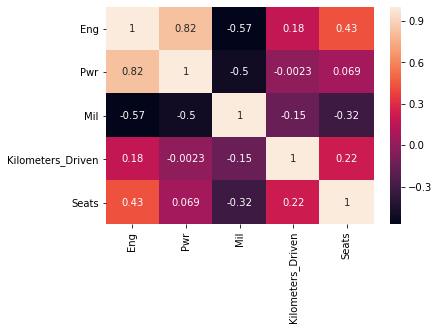

In [98]:
sns.heatmap(ccd.corr(),annot = True)
plt.show()

In [99]:
#x = ccd

In [100]:
#x.isna().sum()

In [101]:
ccd[ccd.Eng.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
23,Skoda,Laura,NaN,NaN,17.50,72000,NaN,Petrol,Manual,Second,Bangalore,NaN
522,Toyota,Etios,NaN,NaN,23.59,56600,NaN,Diesel,Manual,First,Bangalore,NaN
525,Hyundai,i20,NaN,NaN,15.00,58000,NaN,Petrol,Automatic,Second,Bangalore,NaN
614,Mahindra,TUV,NaN,NaN,0.00,27000,NaN,Diesel,Manual,First,Kolkata,NaN
624,Bmw,5,NaN,NaN,18.48,150000,NaN,Diesel,Automatic,Second,Bangalore,NaN
632,Maruti,Swift,NaN,NaN,16.10,36009,NaN,Petrol,Manual,First,Kolkata,NaN
658,Fiat,Punto,NaN,NaN,14.60,65000,NaN,Petrol,Manual,Third,Jaipur,NaN
666,Maruti,Swift,NaN,NaN,16.10,115000,NaN,Petrol,Manual,Second,Pune,NaN
861,Bmw,5,NaN,NaN,18.48,95000,NaN,Diesel,Automatic,Second,Chennai,NaN
883,Toyota,Etios,NaN,NaN,18.30,59311,NaN,Petrol,Manual,First,Kochi,NaN


In [102]:
j=0
for i in ccd['Eng']:
    if np.isnan(i):
        ccd.loc[j,'Eng'] = ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Eng'].mean()
        j = j+1
    else:
        ccd.loc[j,'Eng'] = i
        j = j+1

In [103]:
ccd[ccd.Eng.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price


In [104]:
ccd[(ccd['Brand']=='Honda')&(ccd['Model']=="City")] # Index no 194, treated missing Eng Value

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
8,Honda,City,1497.0,118.0,17.0,66000,5.0,Petrol,Manual,Second,Mumbai,NaN
59,Honda,City,1497.0,78.0,17.7,81000,5.0,Petrol,Manual,First,Delhi,NaN
107,Honda,City,1498.0,98.6,26.0,66346,5.0,Diesel,Manual,First,Jaipur,NaN
184,Honda,City,1497.0,100.0,16.9,76677,5.0,Petrol,Manual,Third,Coimbatore,NaN
201,Honda,City,1497.0,117.3,17.8,19678,5.0,Petrol,Manual,First,Jaipur,NaN
286,Honda,City,1497.0,116.3,16.8,69297,5.0,Petrol,Manual,First,Kochi,NaN
287,Honda,City,1497.0,118.0,17.0,66000,5.0,Petrol,Manual,First,Hyderabad,NaN
294,Honda,City,1497.0,118.0,17.0,88000,5.0,Petrol,Manual,Third,Pune,NaN
302,Honda,City,1497.0,118.0,17.0,50036,5.0,Petrol,Manual,First,Coimbatore,NaN
329,Honda,City,1497.0,118.0,17.0,54652,5.0,Petrol,Manual,First,Jaipur,NaN


In [105]:
ccd[(ccd['Brand']=='Maruti')&(ccd['Model']=='Swift')] #Eng CC and Pwr varies across Fuel_Type, Need to consider while treating Missing value

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
13,Maruti,Swift,1248.0,75.00,17.80,87628,5.0,Diesel,Manual,First,Coimbatore,NaN
18,Maruti,Swift,1197.0,81.80,22.00,15409,5.0,Petrol,Automatic,First,Kochi,NaN
19,Maruti,Swift,1298.0,85.80,17.50,36502,5.0,Petrol,Manual,First,Jaipur,NaN
34,Maruti,Swift,1248.0,74.00,23.40,107000,5.0,Diesel,Manual,First,Kolkata,NaN
35,Maruti,Swift,1197.0,85.80,19.10,51000,5.0,Petrol,Manual,First,Chennai,NaN
93,Maruti,Swift,1248.0,74.00,23.40,110896,5.0,Diesel,Manual,First,Hyderabad,NaN
118,Maruti,Swift,1248.0,73.90,19.30,51000,5.0,Diesel,Manual,First,Delhi,NaN
121,Maruti,Swift,1248.0,74.00,26.59,32287,5.0,Diesel,Manual,First,Hyderabad,NaN
187,Maruti,Swift,1248.0,73.90,19.30,111166,5.0,Diesel,Manual,First,Delhi,NaN
199,Maruti,Swift,1248.0,74.00,23.40,48000,5.0,Diesel,Manual,First,Kolkata,NaN


In [106]:
ccd[(ccd['Brand']=="Land")&(ccd["Model"]=="Rover")] #749 treated Eng missing value.

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
348,Land,Rover,2179.0,147.51,12.39,61062,5.0,Diesel,Automatic,First,Kochi,NaN
407,Land,Rover,2179.0,187.70,12.70,30000,5.0,Diesel,Automatic,First,Hyderabad,NaN
415,Land,Rover,2993.0,245.41,11.40,89190,7.0,Diesel,Automatic,Second,Kochi,NaN
698,Land,Rover,2179.0,147.50,12.83,23342,5.0,Diesel,Automatic,First,Kochi,NaN
838,Land,Rover,2179.0,115.00,0.00,87000,5.0,Diesel,Automatic,First,Mumbai,NaN
1138,Land,Rover,2179.0,187.70,12.70,49000,5.0,Diesel,Automatic,Second,Hyderabad,NaN
1179,Land,Rover,2993.0,241.60,11.80,147202,7.0,Diesel,Automatic,First,Hyderabad,NaN


In [107]:
ccd[(ccd['Brand']=='Hyundai')&(ccd['Model']=='Santro')] # For Most of Santro observations, Eng value is missing treated the same

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
71,Hyundai,Santro,1086.0,62.0,0.00,63831,5.0,Petrol,Manual,First,Ahmedabad,NaN
74,Hyundai,Santro,1086.0,NaN,0.00,47000,5.0,Petrol,Manual,Second,Bangalore,NaN
94,Hyundai,Santro,1086.0,62.1,17.92,62261,5.0,Petrol,Manual,First,Kolkata,NaN
186,Hyundai,Santro,1086.0,62.0,0.00,78000,5.0,Petrol,Manual,First,Ahmedabad,NaN
368,Hyundai,Santro,1086.0,62.1,11.88,43985,5.0,CNG,Manual,First,Bangalore,NaN
420,Hyundai,Santro,999.0,NaN,0.00,43189,5.0,Petrol,Manual,First,Bangalore,NaN
435,Hyundai,Santro,999.0,NaN,0.00,120000,5.0,Petrol,Manual,Fourth & Above,Chennai,NaN
557,Hyundai,Santro,1086.0,NaN,0.00,80000,5.0,Petrol,Manual,First,Kolkata,NaN
592,Hyundai,Santro,1086.0,62.1,17.92,102000,5.0,Petrol,Manual,First,Kolkata,NaN
678,Hyundai,Santro,1086.0,NaN,0.00,85000,5.0,Petrol,Manual,Second,Jaipur,NaN


In [108]:
ccd[ccd.Pwr.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
3,Toyota,Etios,1364.000000,NaN,23.59,139000,5.0,Diesel,Manual,First,Hyderabad,NaN
23,Skoda,Laura,1920.000000,NaN,17.50,72000,NaN,Petrol,Manual,Second,Bangalore,NaN
74,Hyundai,Santro,1086.000000,NaN,0.00,47000,5.0,Petrol,Manual,Second,Bangalore,NaN
122,Toyota,Etios,1364.000000,NaN,23.59,121134,5.0,Diesel,Manual,First,Jaipur,NaN
143,Ford,Fiesta,1399.000000,NaN,17.80,135000,5.0,Diesel,Manual,First,Jaipur,NaN
191,Tata,Indica,1405.000000,NaN,13.50,140000,5.0,Diesel,Manual,Second,Chennai,NaN
197,Hindustan,Motors,1995.000000,NaN,14.10,65000,5.0,Diesel,Manual,Second,Pune,NaN
259,Toyota,Etios,1364.000000,NaN,23.59,90000,5.0,Diesel,Manual,First,Bangalore,NaN
367,Nissan,Teana,2349.000000,NaN,9.10,67038,5.0,Petrol,Automatic,First,Coimbatore,NaN
409,Nissan,Teana,2349.000000,NaN,9.10,63288,5.0,Petrol,Automatic,First,Chennai,NaN


In [109]:
j=0
for i in ccd['Pwr']:
    if np.isnan(i):
        ccd.loc[j,'Pwr'] = ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Pwr'].mean()
        j = j+1
    else:
        ccd.loc[j,'Pwr'] = i
        j = j+1

In [110]:
ccd[ccd.Pwr.isnull()] # still few missing value exists in Pwr

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
197,Hindustan,Motors,1995.0,NaN,14.1,65000,5.0,Diesel,Manual,Second,Pune,NaN


In [111]:
j=0
for i in ccd['Pwr']:
    if np.isnan(i):
        ccd.loc[j,'Pwr'] = ccd[(ccd.Brand == ccd.loc[j,'Brand'])]['Pwr'].mean()
        j = j+1
    else:
        ccd.loc[j,'Pwr'] = i
        j = j+1

In [112]:
ccd[ccd.Pwr.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
197,Hindustan,Motors,1995.0,NaN,14.1,65000,5.0,Diesel,Manual,Second,Pune,NaN


In [113]:
ccd.loc[197,'Pwr'] = 100 # Filled 100bhp for Hindustan Motors

In [114]:
ccd[ccd.Seats.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
23,Skoda,Laura,1920.000000,116.200000,17.50,72000,NaN,Petrol,Manual,Second,Bangalore,NaN
522,Toyota,Etios,1381.117647,81.232000,23.59,56600,NaN,Diesel,Manual,First,Bangalore,NaN
525,Hyundai,i20,1265.745455,84.826000,15.00,58000,NaN,Petrol,Automatic,Second,Bangalore,NaN
614,Mahindra,TUV,1493.000000,100.000000,0.00,27000,NaN,Diesel,Manual,First,Kolkata,NaN
624,Bmw,5,2338.312500,210.250000,18.48,150000,NaN,Diesel,Automatic,Second,Bangalore,NaN
632,Maruti,Swift,1243.031746,77.482295,16.10,36009,NaN,Petrol,Manual,First,Kolkata,NaN
658,Fiat,Punto,1248.000000,91.700000,14.60,65000,NaN,Petrol,Manual,Third,Jaipur,NaN
666,Maruti,Swift,1243.031746,77.482295,16.10,115000,NaN,Petrol,Manual,Second,Pune,NaN
861,Bmw,5,2338.312500,210.250000,18.48,95000,NaN,Diesel,Automatic,Second,Chennai,NaN
883,Toyota,Etios,1381.117647,81.232000,18.30,59311,NaN,Petrol,Manual,First,Kochi,NaN


In [115]:
ccd.isna().sum()

Brand                   0
Model                   0
Eng                     0
Pwr                     0
Mil                     0
Kilometers_Driven       0
Seats                  11
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            1052
dtype: int64

In [116]:
ccd[ccd.Brand.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price


In [117]:
ccd.Seats.fillna(0,inplace = True)

In [118]:
ccd[ccd['Seats']==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
23,Skoda,Laura,1920.000000,116.200000,17.50,72000,0.0,Petrol,Manual,Second,Bangalore,NaN
522,Toyota,Etios,1381.117647,81.232000,23.59,56600,0.0,Diesel,Manual,First,Bangalore,NaN
525,Hyundai,i20,1265.745455,84.826000,15.00,58000,0.0,Petrol,Automatic,Second,Bangalore,NaN
614,Mahindra,TUV,1493.000000,100.000000,0.00,27000,0.0,Diesel,Manual,First,Kolkata,NaN
624,Bmw,5,2338.312500,210.250000,18.48,150000,0.0,Diesel,Automatic,Second,Bangalore,NaN
632,Maruti,Swift,1243.031746,77.482295,16.10,36009,0.0,Petrol,Manual,First,Kolkata,NaN
658,Fiat,Punto,1248.000000,91.700000,14.60,65000,0.0,Petrol,Manual,Third,Jaipur,NaN
666,Maruti,Swift,1243.031746,77.482295,16.10,115000,0.0,Petrol,Manual,Second,Pune,NaN
861,Bmw,5,2338.312500,210.250000,18.48,95000,0.0,Diesel,Automatic,Second,Chennai,NaN
883,Toyota,Etios,1381.117647,81.232000,18.30,59311,0.0,Petrol,Manual,First,Kochi,NaN


In [119]:
j=0
for i in ccd['Seats']:
    if i == 0:
        ccd.loc[j,'Seats'] = round(ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Seats'].mean())
        j = j+1
    else:
        ccd.loc[j,'Seats'] = i
        j = j+1

In [120]:
ccd[ccd['Seats']==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price


In [121]:
ccd.head()

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price
0,Maruti,Alto,998.0,58.200,32.26,40929,4.0,CNG,Manual,First,Delhi,NaN
1,Maruti,Alto,796.0,47.300,24.70,54493,5.0,Petrol,Manual,Second,Coimbatore,NaN
2,Toyota,Innova,2393.0,147.800,13.68,34000,7.0,Diesel,Manual,First,Mumbai,25.27 Lakh
3,Toyota,Etios,1364.0,81.232,23.59,139000,5.0,Diesel,Manual,First,Hyderabad,NaN
4,Hyundai,i20,1197.0,82.850,18.50,29000,5.0,Petrol,Manual,First,Mumbai,NaN


In [122]:
ccd['Mil']

0       32.26
1       24.70
2       13.68
3       23.59
4       18.50
5       16.00
6       12.55
7       21.10
8       17.00
9       15.10
10      12.80
11      18.90
12      13.40
13      17.80
14      13.24
15      17.05
16      19.59
17      13.80
18      22.00
19      17.50
20      23.20
21      18.06
22      24.70
23      17.50
24      15.50
25      13.80
26      19.70
27      27.30
28      21.66
29      17.00
        ...  
1204    11.50
1205    19.83
1206    13.10
1207     0.00
1208    19.20
1209    27.28
1210    14.40
1211    18.60
1212    17.00
1213    16.00
1214    16.55
1215    17.10
1216    24.30
1217    18.60
1218    25.80
1219    16.55
1220    15.50
1221    27.30
1222    16.73
1223    18.90
1224    19.87
1225    14.49
1226    18.00
1227    18.90
1228    21.10
1229    20.54
1230    17.21
1231    23.08
1232    17.20
1233    10.00
Name: Mil, Length: 1234, dtype: float64

In [123]:
j=0
for i in ccd['Mil']:
    if i == 0:
        ccd.loc[j,'Mil'] = round(ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Mil'].mean())
        j = j+1
    else:
        ccd.loc[j,'Mil'] = i
        j = j+1

In [124]:
ccd[ccd["Mil"]==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price


In [125]:
ccd = ccd[ccd.Fuel_Type != 'Electric']

In [126]:
ccd.isna().sum() # Need to treat Outliers 

Brand                   0
Model                   0
Eng                     0
Pwr                     0
Mil                     0
Kilometers_Driven       0
Seats                   0
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            1052
dtype: int64

In [127]:
ccd = ccd.drop(['New_Price'], axis =1)

In [128]:
ccd.isna().sum() # Need to treat Outliers 

Brand                0
Model                0
Eng                  0
Pwr                  0
Mil                  0
Kilometers_Driven    0
Seats                0
Fuel_Type            0
Transmission         0
Owner_Type           0
Location             0
dtype: int64

In [129]:
ccd.dtypes

Brand                 object
Model                 object
Eng                  float64
Pwr                  float64
Mil                  float64
Kilometers_Driven      int64
Seats                float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Location              object
dtype: object

In [130]:
ccd["Brand"] = ccd["Brand"].astype('category')
ccd["Model"] = ccd["Model"].astype('category')
ccd["Fuel_Type"] = ccd["Fuel_Type"].astype('category')
ccd["Transmission"] = ccd["Transmission"].astype('category')
ccd["Owner_Type"] = ccd["Owner_Type"].astype('category')
ccd["Location"] = ccd["Location"].astype('category')

In [131]:
ccd["Brand_cat"] = ccd["Brand"].cat.codes
ccd["Model_cat"] = ccd["Model"].cat.codes
ccd["Fuel_Type_cat"] = ccd["Fuel_Type"].cat.codes
ccd["Transmission_cat"] = ccd["Transmission"].cat.codes
ccd["Owner_Type_cat"] = ccd["Owner_Type"].cat.codes
ccd["Location_cat"] = ccd["Location"].cat.codes

In [132]:
ccd1 = ccd.drop(['Brand',"Model","Fuel_Type","Transmission","Owner_Type","Location"], axis =1)

In [133]:
ccd1.head()

,Eng,Pwr,Mil,Kilometers_Driven,Seats,Brand_cat,Model_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Location_cat
0,998.0,58.200,32.26,40929,4.0,15,16,0,1,0,4
1,796.0,47.300,24.70,54493,5.0,15,16,3,1,2,3
2,2393.0,147.800,13.68,34000,7.0,25,78,1,1,0,9
3,1364.0,81.232,23.59,139000,5.0,25,60,1,1,0,5
4,1197.0,82.850,18.50,29000,5.0,9,159,3,1,0,9


In [134]:
td = ccd1

In [135]:
td1 = pd.get_dummies(td, columns = ['Fuel_Type_cat','Brand_cat','Model_cat','Transmission_cat','Owner_Type_cat','Location_cat'])

In [143]:
%store td1

Stored 'td1' (DataFrame)


NameError: name 'md1' is not defined

In [ ]:
#Importing Test Data